In [0]:
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("GMMClustering").getOrCreate()

# Example data (you can replace this with your own dataset)
data = [
    (Vectors.dense([-0.1, -0.05]),),
    (Vectors.dense([-0.01, -0.1]),),
    (Vectors.dense([0.9, 0.8]),),
    (Vectors.dense([0.75, 0.935]),),
    (Vectors.dense([-0.83, -0.68]),),
    (Vectors.dense([-0.91, -0.76]),)
]
df = spark.createDataFrame(data, ["features"])

# Create a GaussianMixture model
gm = GaussianMixture(k=3, tol=0.0001, seed=10)

# Fit the model to the data
model = gm.fit(df)

# Get cluster information
summary = model.summary
print(f"Number of clusters: {summary.k}")
print(f"Cluster sizes: {summary.clusterSizes}")

# Access model parameters
weights = model.weights
gaussians = model.gaussians
for i, gaussian in enumerate(gaussians):
    print(f"Cluster {i} - Mean: {gaussian.mean}, Covariance: {gaussian.cov}")

# Make predictions
transformed = model.transform(df).select("features", "prediction")
transformed.show()

# Save and load the model
model_path = "path/to/save/model"
model.save(model_path)
loaded_model = GaussianMixture.load(model_path)

Number of clusters: 3
Cluster sizes: [2, 3, 1]
Cluster 0 - Mean: [0.8250000000000001,0.8675], Covariance: DenseMatrix([[ 0.005625  , -0.0050625 ],
             [-0.0050625 ,  0.00455625]])
Cluster 1 - Mean: [-0.613333333333333,-0.4966666666666664], Covariance: DenseMatrix([[0.13282222, 0.11571111],
             [0.11571111, 0.10082222]])
Cluster 2 - Mean: [-0.010000000000000023,-0.10000000000000003], Covariance: DenseMatrix([[1.74014449e-17, 1.19262239e-17],
             [1.19262239e-17, 6.93889390e-18]])
+-------------+----------+
|     features|prediction|
+-------------+----------+
| [-0.1,-0.05]|         1|
| [-0.01,-0.1]|         2|
|    [0.9,0.8]|         0|
| [0.75,0.935]|         0|
|[-0.83,-0.68]|         1|
|[-0.91,-0.76]|         1|
+-------------+----------+



---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-2908121104079600>:43
     41 model_path = "path/to/save/model"
     42 model.save(model_path)
---> 43 loaded_model = GaussianMixture.load(model_path)

File /databricks/spark/python/pyspark/ml/util.py:447, in MLReadable.load(cls, path)
    444 @classmethod
    445 def load(cls, path: str) -> RL:
    446     """Reads an ML instance from the input path, a shortcut of `read().load(path)`."""
--> 447     return cls.read().load(path)

File /databricks/spark/python/pyspark/ml/util.py:396, in JavaMLReader.load(self, path)
    394 if not isinstance(path, str):
    395     raise TypeError("path should be a string, got type %s" % type(path))
--> 396 java_obj = self._jread.load(path)
    397 if not hasattr(self._clazz, "_from_java"):
    398     raise NotImplementedError(
    399         "This Java ML type cannot be loaded into Python

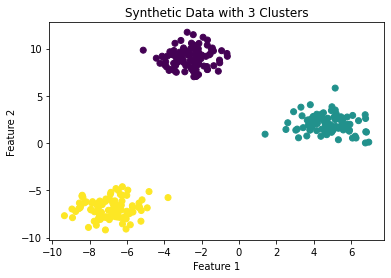

In [0]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data with 3 Clusters')
plt.show()

In [0]:
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("GMMClustering").getOrCreate()

# Example data (use your own dataset or the one generated above)
data = [(Vectors.dense(X[i]),) for i in range(len(X))]
df = spark.createDataFrame(data, ["features"])

# Create a GaussianMixture model
gm = GaussianMixture(k=3, tol=0.0001, seed=10)

# Fit the model to the data
model = gm.fit(df)

# Make predictions
transformed = model.transform(df).select("features", "prediction")

# Show the transformed data (features and predicted cluster)
transformed.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-7.3389880906915...|         1|
|[-7.7400405564352...|         1|
|[-1.6866527109495...|         2|
|[4.42219763300088...|         2|
|[-8.9177517263291...|         1|
|[5.49753845943012...|         2|
|[-2.3360166972015...|         2|
|[5.05281029050372...|         2|
|[-2.9883718608980...|         2|
|[-3.7005011202553...|         2|
|[-3.1109042352821...|         2|
|[4.99689432219314...|         2|
|[-2.3003340280479...|         2|
|[-3.9245683651031...|         2|
|[-7.5302697602730...|         1|
|[-3.2112507169301...|         2|
|[-8.5071696290344...|         1|
|[2.61473624957049...|         2|
|[-2.4121200737047...|         2|
|[-1.9223405292524...|         2|
+--------------------+----------+
only showing top 20 rows



Silhouette Score: 0.6313705913786098


/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


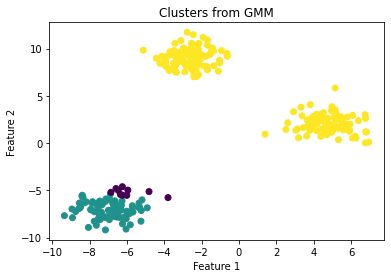

In [0]:
# Evaluate the model (you can choose other metrics as well)
# For example, silhouette score:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(transformed)
print(f"Silhouette Score: {silhouette_score}")

# Plot the clusters (assuming 2D data)
transformed_pd = transformed.toPandas()
plt.scatter(transformed_pd["features"].apply(lambda x: x[0]), transformed_pd["features"].apply(lambda x: x[1]), c=transformed_pd["prediction"], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters from GMM')
plt.show()

In [0]:
#new code
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (0: Setosa, 1: Versicolour, 2: Virginica)

In [0]:
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("GMMClustering").getOrCreate()

# Convert the scikit-learn data to a DataFrame
data = [(Vectors.dense(X[i]),) for i in range(len(X))]
df = spark.createDataFrame(data, ["features"])

# Create a GaussianMixture model
gm = GaussianMixture(k=3, tol=0.0001, seed=10)

# Fit the model to the data
model = gm.fit(df)

# Make predictions
transformed = model.transform(df).select("features", "prediction")

# Show the transformed data (features and predicted cluster)
transformed.show()

+-----------------+----------+
|         features|prediction|
+-----------------+----------+
|[5.1,3.5,1.4,0.2]|         2|
|[4.9,3.0,1.4,0.2]|         2|
|[4.7,3.2,1.3,0.2]|         2|
|[4.6,3.1,1.5,0.2]|         2|
|[5.0,3.6,1.4,0.2]|         2|
|[5.4,3.9,1.7,0.4]|         2|
|[4.6,3.4,1.4,0.3]|         2|
|[5.0,3.4,1.5,0.2]|         2|
|[4.4,2.9,1.4,0.2]|         2|
|[4.9,3.1,1.5,0.1]|         2|
|[5.4,3.7,1.5,0.2]|         2|
|[4.8,3.4,1.6,0.2]|         2|
|[4.8,3.0,1.4,0.1]|         2|
|[4.3,3.0,1.1,0.1]|         2|
|[5.8,4.0,1.2,0.2]|         2|
|[5.7,4.4,1.5,0.4]|         2|
|[5.4,3.9,1.3,0.4]|         2|
|[5.1,3.5,1.4,0.3]|         2|
|[5.7,3.8,1.7,0.3]|         2|
|[5.1,3.8,1.5,0.3]|         2|
+-----------------+----------+
only showing top 20 rows



Silhouette Score: 0.4301095120820948


/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


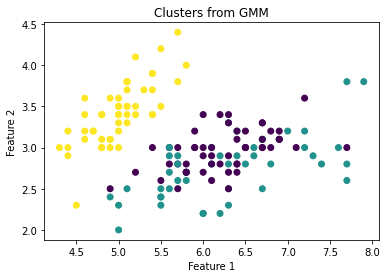

In [0]:
# Evaluate the model (you can choose other metrics as well)
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(transformed)
print(f"Silhouette Score: {silhouette_score}")

# Plot the clusters (assuming 2D data)
transformed_pd = transformed.toPandas()
plt.scatter(transformed_pd["features"].apply(lambda x: x[0]), transformed_pd["features"].apply(lambda x: x[1]), c=transformed_pd["prediction"], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters from GMM')
plt.show()